# Data Science intern @LetsGrowMore
# Author : Amit jaiwal
# ADVANCED LEVEL TASK No - 4

# <center>Develop A Neural Network That Can Read Handwriting</center>


In [36]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import random

import tensorflow as tf
print("TF_VERSION:", tf.__version__)

# set seed
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)


import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

TF_VERSION: 2.3.0


## Load Dataset

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

#### Check for NULL values

In [4]:
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

#### Creating Numpy array from dataframe
- Image: (-1, 784)
- Label: (-1, 1)



In [5]:
# numpy array from pandas df
X_train, y_train = np.array(train_df.loc[:, 'pixel0':]), np.array(train_df.label)
X_test = np.array(test_df.loc[:, 'pixel0':])
print(X_train.shape, y_train.shape, X_test.shape)

(42000, 784) (42000,) (28000, 784)


#### Reshaping image from 1D to 2D, for whole dataset 2D to 3D.
- Image: (-1, 28, 28)
- Label: (-1, 1)

In [6]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)
print(X_train.shape, y_train.shape, X_test.shape)

(42000, 28, 28) (42000,) (28000, 28, 28)


## Plotting

#### Check for number of samples per target variable

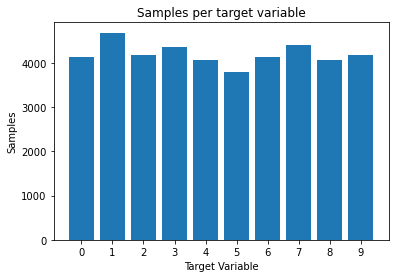

In [7]:
count_array = np.unique(y_train, return_counts=True)
plt.bar(count_array[0], count_array[1])
plt.xticks(count_array[0])
plt.xlabel("Target Variable")
plt.ylabel("Samples")
plt.title("Samples per target variable")
plt.show()

#### let's we plot some sample images

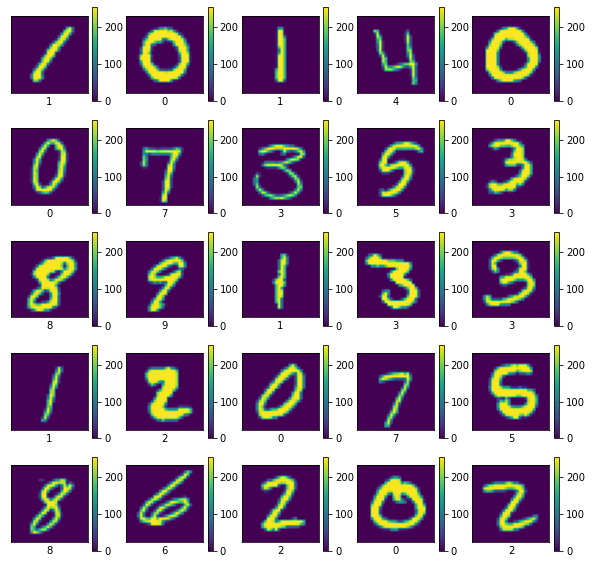

In [8]:
# let see some images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.colorbar()
    plt.xlabel(y_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 

In [10]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(X_train.shape, y_train.shape, X_test.shape)

(42000, 28, 28, 1) (42000,) (28000, 28, 28, 1)


In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train.min(), X_train.max(), X_test.min(), X_train.max()

(0.0, 1.0, 0.0, 1.0)

In [13]:
y_train = to_categorical(y_train, num_classes=10)
y_train.shape

(42000, 10)

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

## Model Training 

In [15]:
# let's try simple CNN model

model = Sequential([
    
    # feature learning model
    Conv2D(8, (3,3), padding='same', input_shape=(28,28,1), activation='relu'),
    MaxPool2D(2,2),
    
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPool2D(2,2),
    
    Flatten(),
    
    # classification model
    Dense(128, activation='relu'),
    
    Dropout(0.2),
    Dense(10, activation='softmax')
    
])
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [17]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[reduce_lr])

Epoch 1/20
880/880 [==============================] - 9s 11ms/step - loss: 0.2949 - accuracy: 0.9087 - val_loss: 0.0907 - val_accuracy: 0.9719
Epoch 2/20
880/880 [==============================] - 9s 10ms/step - loss: 0.0938 - accuracy: 0.9708 - val_loss: 0.0658 - val_accuracy: 0.9808
Epoch 3/20
880/880 [==============================] - 9s 10ms/step - loss: 0.0686 - accuracy: 0.9792 - val_loss: 0.0589 - val_accuracy: 0.9827
Epoch 4/20
880/880 [==============================] - 9s 10ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0538 - val_accuracy: 0.9834
Epoch 5/20
880/880 [==============================] - 9s 10ms/step - loss: 0.0461 - accuracy: 0.9852 - val_loss: 0.0498 - val_accuracy: 0.9835
Epoch 6/20
880/880 [==============================] - 9s 10ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0552 - val_accuracy: 0.9835
Epoch 7/20
880/880 [==============================] - 9s 11ms/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0486 - val_accuracy: 0.9867

## Model validation

#### checking model accuracy

In [18]:
prediction = model.predict(X_valid, verbose=1)
prediction_arg_max = prediction.argmax(axis=1)

434/434 [==============================] - 2s 4ms/step


In [19]:
y_valid_arg_max = y_valid.argmax(axis=1)

In [20]:
from sklearn.metrics import confusion_matrix

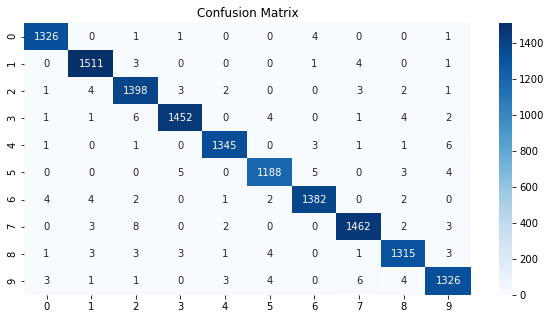

In [21]:
cm = confusion_matrix(y_valid_arg_max, prediction_arg_max)
plt.figure(figsize=(10,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.show()

>  some "3" class images falsely predicted as "5" or "8" class

#### let we check some wrong predicted images

In [22]:
true_3_predicted_5_8 = ((y_valid_arg_max == 3) & ((prediction_arg_max == 5) | (prediction_arg_max == 8)))
true_3_predicted_5_8.sum()

8

In [23]:
check_x = X_valid[true_3_predicted_5_8]
check_y = y_valid_arg_max[true_3_predicted_5_8]
check_predict_y = prediction_arg_max[true_3_predicted_5_8]
check_x.shape, check_y.shape, check_predict_y.shape

((8, 28, 28, 1), (8,), (8,))

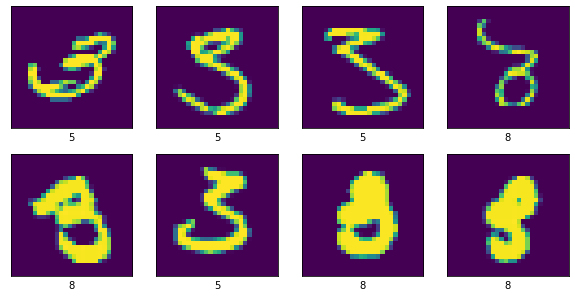

In [24]:
plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4, i+1)
    plt.imshow(check_x[i])
    plt.xlabel(check_predict_y[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Save submission

In [25]:
pred = model.predict(X_test, verbose=1)
pred = pred.argmax(axis=1)

875/875 [==============================] - 4s 4ms/step


In [27]:
sample_df = pd.read_csv('sample_submission.csv')
sample_df.to_csv("submission.csv", index=False)

In [28]:
sample_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [29]:
sample_df.groupby('Label').size()

Label
0    28000
dtype: int64

In [30]:
# update classes with actual result
sample_df['Label'] = pred

In [31]:
sample_df.groupby('Label').size()

Label
0    2781
1    3201
2    2826
3    2782
4    2770
5    2517
6    2734
7    2887
8    2737
9    2765
dtype: int64

In [33]:
sample_df.to_csv("submission.csv", index=False)

# LGM VIP 4TH TASK SUCCESSFULLY COMPELETED